# Name - Kode Jai Surya

# Task 1- Prediction using Supervised ML

# The Spark Foundation GRIPFEB21

# Predict the percentage of the student based on the no. of study hours.
In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Exploration

In [3]:
df.shape

(25, 2)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Data Visualization

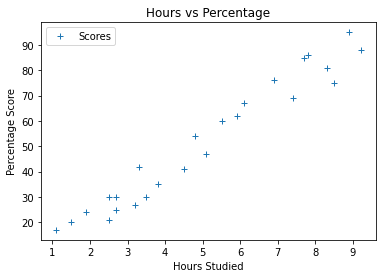

In [6]:
df.plot(x='Hours', y='Scores', style='+')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

We have plotted Hours vs Percentage and we can see that the relation between is positive and linear.

# Spliting the Data for Training and Testing

In [7]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Training the Linear Model

In [9]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

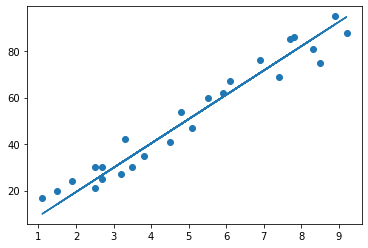

In [10]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Predictions

In [11]:
y_pred = regressor.predict(X_test)

In [12]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


# Validation Score

In [13]:
print(f'The train score: {regressor.score(X_train,y_train)*100} %')
print(f'The test score: {regressor.score(X_test,y_test)*100} %')

The train score: 96.37848283990598 %
The test score: 84.21031525243528 %


# Question : What will be predicted score if a student studies for 9.25 hrs/ day?

In [14]:
hours=9.25
predicted = regressor.predict([[hours]])
print(" Predicted Score =",predicted ," %")

 Predicted Score = [95.22829438]  %


# Error Calculation
This step is important to compare the performance of the algorithm. 

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred),'%')
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred),'%')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)),'%')

Mean Absolute Error: 7.882398086270432 %
Mean Squared Error: 68.88092074277635 %
Root Mean Squared Error: 8.299453038771674 %
